In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.text_cell_render ul li{font-size:22pt; line-height:30px;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

In [2]:
# ===============================
# 📌 기본 라이브러리
# ===============================
import pandas as pd
import numpy as np

# ===============================
# 📌 시각화 라이브러리
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 📌 경고 메시지 제거 (대용량 CSV 처리 시 깔끔)
# ===============================
import warnings
warnings.filterwarnings("ignore")

# ===============================
# 📌 한글 폰트 설정 (Windows)
# ===============================
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# ===============================
# 📌 CSV에서 불러올 컬럼 지정
# (불필요한 컬럼 제거 → 메모리 절약)
# ===============================
use_cols = [
    '인허가일자',
    '상세영업상태명',
    '폐업일자',
    '소재지전체주소',
    '도로명전체주소',
    '업태구분명',
    '좌표정보x(epsg5174)',
    '좌표정보y(epsg5174)',
    '사업장명'
]


In [5]:
# ===============================
# 📌 데이터 로드
# ===============================
df = pd.read_csv(
    r"C:\ai\lecNote\1st_project\data\6110000_서울특별시_07_24_04_P_일반음식점.csv",
    encoding="cp949",
    usecols=use_cols,
    low_memory=False
)

In [6]:
df.head()


,인허가일자,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,좌표정보x(epsg5174),좌표정보y(epsg5174)
0,2024-05-30,영업,NaN,서울특별시 강북구 수유동 229-46,"서울특별시 강북구 도봉로87길 11, 지하1층 (수유동)",미라클,기타,202125.400308,459553.074675
1,2025-05-02,영업,NaN,서울특별시 종로구 관훈동 155-2,"서울특별시 종로구 인사동길 49, 3층 4호 (관훈동)",얌얌 스파이스,"외국음식전문점(인도,태국등)",198498.918633,452473.403750
2,2025-05-02,영업,NaN,서울특별시 종로구 관훈동 155-2,"서울특별시 종로구 인사동길 49, 4층 401호 (관훈동)",꽃게 먹는 보리밥,한식,198498.918633,452473.403750
3,2025-05-02,영업,NaN,서울특별시 종로구 인사동 241,"서울특별시 종로구 종로11길 9-10, 2층 (인사동)",종각 밥상,기타,198625.513334,452075.105119
4,2024-05-31,영업,NaN,서울특별시 양천구 신월동 60-33,"서울특별시 양천구 화곡로 96, 1층 (신월동)",전주가콩나물국밥전문점 화곡점,한식,185121.904558,448581.231912


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527872 entries, 0 to 527871
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   인허가일자            527872 non-null  object 
 1   상세영업상태명          527872 non-null  object 
 2   폐업일자             406206 non-null  object 
 3   소재지전체주소          527644 non-null  object 
 4   도로명전체주소          277927 non-null  object 
 5   사업장명             527871 non-null  object 
 6   업태구분명            527854 non-null  object 
 7   좌표정보x(epsg5174)  495424 non-null  float64
 8   좌표정보y(epsg5174)  495424 non-null  float64
dtypes: float64(2), object(7)
memory usage: 36.2+ MB


In [8]:
df.isna().sum()


인허가일자                   0
상세영업상태명                 0
폐업일자               121666
소재지전체주소               228
도로명전체주소            249945
사업장명                    1
업태구분명                  18
좌표정보x(epsg5174)     32448
좌표정보y(epsg5174)     32448
dtype: int64

In [9]:
# 소재지 주소가 있으면 우선 사용, 없으면 도로명 주소 사용
df['주소'] = df['소재지전체주소'].fillna(df['도로명전체주소'])


In [10]:
df['주소'].isna().sum()


0

In [11]:
# 주소 문자열에서 '○○구' 패턴 추출
df['구'] = df['주소'].str.extract(r'(서울특별시\s*)?(\w+구)')[1]
# 구 정보 없는 행 제거
df[['주소', '구']].head()

,주소,구
0,서울특별시 강북구 수유동 229-46,강북구
1,서울특별시 종로구 관훈동 155-2,종로구
2,서울특별시 종로구 관훈동 155-2,종로구
3,서울특별시 종로구 인사동 241,종로구
4,서울특별시 양천구 신월동 60-33,양천구


In [12]:
# '구' 결측치 제거
df['구'].isna().sum()
df = df[df['구'].notna()].copy()

In [13]:
# 서울특별시 데이터만 유지 (타 지역 자동 제거)
df = df[df['주소'].str.contains('서울', na=False)].copy()


In [14]:
# 문자열 → datetime 변환
df['인허가일자'] = pd.to_datetime(df['인허가일자'], errors='coerce')
df['폐업일자'] = pd.to_datetime(df['폐업일자'], errors='coerce')

# 인허가일자 없는 행 제거
df = df[df['인허가일자'].notna()].copy()

# ✅ 2015년 이후만 사용
df = df[df['인허가일자'] >= '2015-01-01'].copy()

# 좌표 결측치 제거
df = df[
    df['좌표정보x(epsg5174)'].notna() &
    df['좌표정보y(epsg5174)'].notna()
].copy()

In [15]:
# 창업월, 창업연도
df['창업월'] = df['인허가일자'].dt.month
df['창업연도'] = df['인허가일자'].dt.year


In [16]:
# 영업 기간 계산 
df['영업일수'] = (
    df['폐업일자'].fillna(pd.Timestamp.today())
    - df['인허가일자']
).dt.days

In [17]:
#3년 이내 폐업 여부
df['폐업_3년이내'] = (
    (df['폐업일자'].notna()) &
    (df['영업일수'] <= 365 * 3)
).astype(int)

In [18]:
#문자열의 앞뒤 공백을 제거
df['업태'] = df['업태구분명'].str.strip()


In [19]:
# 업태 빈도
type_counts = df['업태'].value_counts()

# 10개 이하 업태 목록
rare_types = type_counts[type_counts <= 10].index

rare_types

Index(['기타 휴게음식점', '전통찻집', '식품소분업'], dtype='object')

In [20]:
# 표본 10개 이하 업태 → 기타로 통합
df['업태_정리'] = df['업태'].replace(rare_types, '기타')

In [28]:
KEYWORD_GROUPS = {
    '카페': ['카페', '커피', 'coffee', 'COFFEE','케이크', '까페', 'cafe', 'CAFÉ', '다방', '샐러드', '프레소', '티', '차', '디저트'],
    '한식': ['식당', '찜', '전골', '전', '음식점', '밥상', '한식', '순대', '찌개', '구이' ,'곱창', '국수', '고기', '구이', '국', '밥', '마당', '옥', '관', '떡볶이', '김밥'],
    '주점/치킨': ['크리스피', 'KFC', 'kfc', '치킨', '비비큐', 'bbq',  'BBQ', '후라이드', '술집', '주점', '포장마차', '술', '호프', '건배', '맥주', '포차','펍','pup' ,'PUP', '주점', '바', '룸' ,'와인', '포차','소주', '맥주', '아지트', '잔', '위스키', '클럽'],
    '양식/외식': ['베이커리', '빵', '아웃백'],
    '중/일식': ['마라탕','양꼬치','샤브']
}

In [35]:
def reclassify_etc(row):
    if row['업태_정리'] != '기타':
        return row['업태_정리']

    text = f"{row['사업장명']} {row['업태']}".lower()

    for group, keywords in KEYWORD_GROUPS.items():
        for kw in keywords:
            if kw.lower() in text:
                return group

    return '기타'

df['업태_최종'] = df.apply(reclassify_etc, axis=1)

df['업태_최종'].value_counts()

한식                 54162
기타                 25290
경양식                10919
호프/통닭               9681
일식                  8683
카페                  7990
분식                  7272
중국식                 5180
외국음식전문점(인도,태국등)     3387
주점/치킨               2386
식육(숯불구이)            1392
정종/대포집/소주방          1380
김밥(도시락)              629
횟집                   615
뷔페식                  509
감성주점                 493
까페                   440
패밀리레스트랑              369
양식/외식                325
라이브카페                297
냉면집                  296
통닭(치킨)               196
중/일식                 134
출장조리                 122
키즈카페                  91
패스트푸드                 63
탕류(보신용)               61
복어취급                  26
Name: 업태_최종, dtype: int64

In [42]:
def map_category(x):
    if pd.isna(x):
        return '기타'

    # 🔹 이미 대분류면 그대로 유지
    if x in ['한식', '카페', '주점/치킨', '양식/외식', '중/일식']:
        return x

    # 🔹 세부 업태 → 대분류
    if x in ['탕류(보신용)', '냉면집', '식육(숯불구이)']:
        return '한식'

    if x in ['분식', '김밥(도시락)', '패스트푸드']:
        return '분식/간편식'

    if x in ['경양식', '패밀리레스트랑', '외국음식전문점(인도,태국등)', '뷔페식']:
        return '양식/외식'

    if x in ['중국식', '일식']:
        return '중/일식'

    if x in ['호프/통닭', '정종/대포집/소주방', '통닭(치킨)', '감성주점', '간이주점', '룸살롱']:
        return '주점/치킨'

    if x in ['까페', '커피숍', '전통찻집', '라이브카페', '다방', '키즈카페']:
        return '카페'

    return '기타'


In [43]:
df['업태_그룹'] = df['업태_최종'].apply(map_category)

In [44]:
df['업태_그룹'].value_counts()

한식        55911
기타        26055
양식/외식     15509
주점/치킨     14136
중/일식      13997
카페         8818
분식/간편식     7964
Name: 업태_그룹, dtype: int64

In [45]:
# 업태 그룹별 3년 이내 폐업률 (%)로 출력
(
    df.groupby('업태_그룹')['폐업_3년이내']
      .mean()
      .mul(100)
      .round(1)
      .sort_values()
)


업태_그룹
중/일식      27.5
양식/외식     30.8
한식        31.7
카페        31.9
주점/치킨     32.4
분식/간편식    37.3
기타        39.0
Name: 폐업_3년이내, dtype: float64

In [46]:
# 구별 폐업률
gu_rate = (
    df.groupby('구')['폐업_3년이내']
    .mean()
    .sort_values(ascending=False)
)

gu_rate.mul(100).round(1).head(10)


구
양천구    38.6
관악구    38.2
강남구    38.1
강북구    36.8
구로구    35.8
강동구    35.3
노원구    35.1
은평구    34.5
송파구    34.2
강서구    33.9
Name: 폐업_3년이내, dtype: float64

In [47]:
# ===============================
#  구 × 업태 그룹 폐업률 Pivot
# ===============================
pivot_gu_type = df.pivot_table(
    values='폐업_3년이내',
    index='구',
    columns='업태_그룹',
    aggfunc='mean'
)


In [48]:
pivot_gu_type_pct = pivot_gu_type.mul(100).round(1)
pivot_gu_type_pct

업태_그룹,기타,분식/간편식,양식/외식,주점/치킨,중/일식,카페,한식
구,,,,,,,
강남구,47.0,42.5,35.4,36.8,29.6,39.1,36.8
강동구,40.1,41.2,31.1,34.7,27.6,31.1,35.8
강북구,43.7,38.6,24.1,37.4,31.0,36.8,33.9
강서구,30.5,34.8,35.4,31.2,32.0,28.5,35.0
관악구,33.5,39.6,39.6,40.3,35.0,35.5,38.6
광진구,33.2,41.7,35.4,30.7,28.9,30.3,32.6
구로구,49.0,36.5,30.8,30.0,29.2,31.1,37.2
금천구,29.7,37.8,30.5,25.9,27.7,25.1,31.3
노원구,46.2,35.0,32.6,39.6,25.6,30.6,32.6


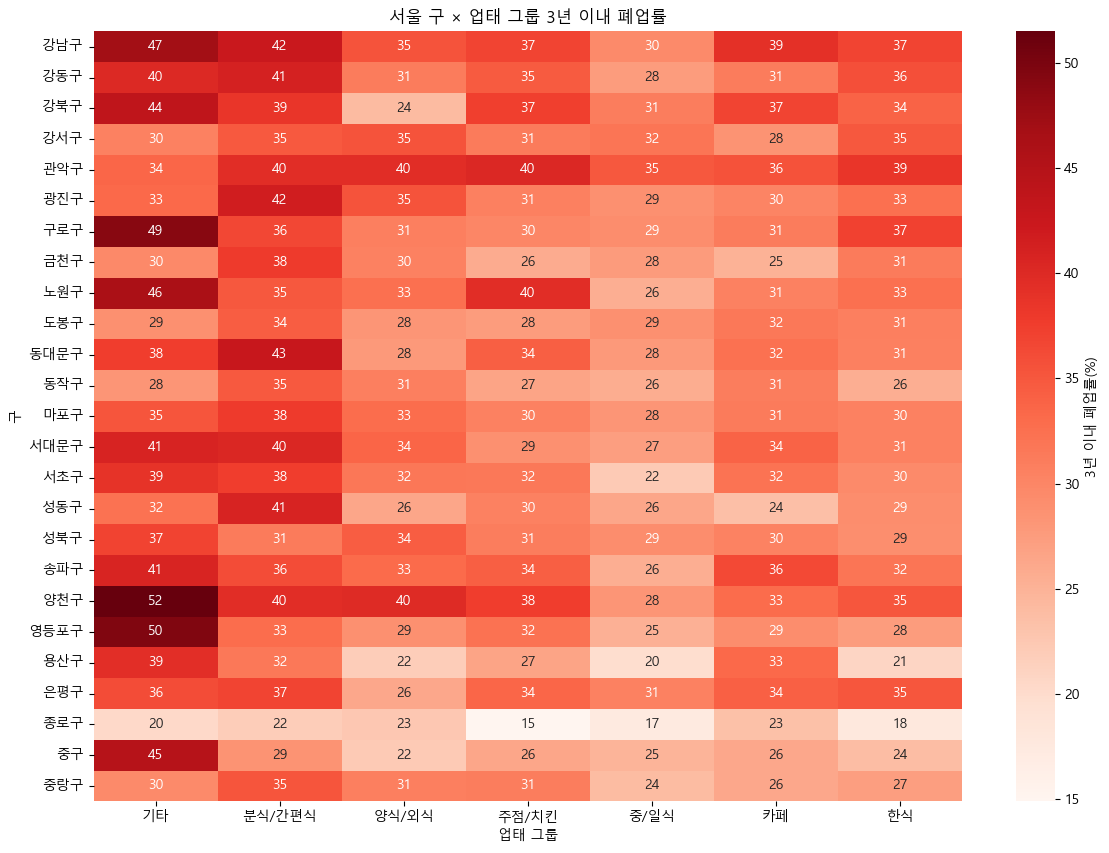

In [49]:
# ===============================
#  히트맵 시각화
# ===============================
plt.figure(figsize=(14,10))
sns.heatmap(
    pivot_gu_type_pct,
    cmap='Reds',
    annot=True,
    cbar_kws={'label': '3년 이내 폐업률(%)'}
)
plt.title('서울 구 × 업태 그룹 3년 이내 폐업률')
plt.xlabel('업태 그룹')
plt.ylabel('구')
plt.show()


In [50]:
# ===============================
#  위험 조합 TOP 추출
# ===============================
risk_table = pivot_gu_type_pct.stack().reset_index()
risk_table.columns = ['구', '업태_그룹', '폐업률']
risk_table.sort_values('폐업률', ascending=False).head(10)

,구,업태_그룹,폐업률
126,양천구,기타,51.5
133,영등포구,기타,49.6
42,구로구,기타,49.0
0,강남구,기타,47.0
56,노원구,기타,46.2
161,중구,기타,44.9
14,강북구,기타,43.7
71,동대문구,분식/간편식,42.9
1,강남구,분식/간편식,42.5
36,광진구,분식/간편식,41.7


In [51]:
# ===============================
#  지도 시각화용 라이브러리 아나콘다에 설치.
#  아나콘다 프롬프트에서
#  conda install -c conda-forge geopandas 
# ===============================

import geopandas as gpd
from shapely.geometry import Point

gpd.__version__


'0.12.0'

In [52]:
gu_rate_map = (
    df.groupby('구')['폐업_3년이내']
      .mean()
      .mul(100)
      .round(1)
      .reset_index()
)

gu_rate_map.sort_values('폐업_3년이내', ascending=False).head()


,구,폐업_3년이내
18,양천구,38.6
4,관악구,38.2
0,강남구,38.1
2,강북구,36.8
6,구로구,35.8


In [53]:
seoul_map = gpd.read_file(
    "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
)

seoul_map.head()


,code,name,name_eng,base_year,geometry
0,11250,강동구,Gangdong-gu,2013,"POLYGON ((127.11520 37.55753, 127.11880 37.557..."
1,11240,송파구,Songpa-gu,2013,"POLYGON ((127.06907 37.52228, 127.07496 37.520..."
2,11230,강남구,Gangnam-gu,2013,"POLYGON ((127.05867 37.52630, 127.06907 37.522..."
3,11220,서초구,Seocho-gu,2013,"POLYGON ((127.01397 37.52504, 127.01918 37.520..."
4,11210,관악구,Gwanak-gu,2013,"POLYGON ((126.98368 37.47386, 126.98464 37.469..."


In [54]:
# 지도 쪽 구 이름 컬럼 통일
seoul_map['구'] = seoul_map['name']

# merge
map_df = seoul_map.merge(
    gu_rate_map,
    on='구',
    how='left'
)

map_df

,code,name,name_eng,base_year,geometry,구,폐업_3년이내
0,11250,강동구,Gangdong-gu,2013,"POLYGON ((127.11520 37.55753, 127.11880 37.557...",강동구,35.3
1,11240,송파구,Songpa-gu,2013,"POLYGON ((127.06907 37.52228, 127.07496 37.520...",송파구,34.2
2,11230,강남구,Gangnam-gu,2013,"POLYGON ((127.05867 37.52630, 127.06907 37.522...",강남구,38.1
3,11220,서초구,Seocho-gu,2013,"POLYGON ((127.01397 37.52504, 127.01918 37.520...",서초구,31.8
4,11210,관악구,Gwanak-gu,2013,"POLYGON ((126.98368 37.47386, 126.98464 37.469...",관악구,38.2
5,11200,동작구,Dongjak-gu,2013,"POLYGON ((126.98224 37.50931, 126.98242 37.501...",동작구,27.6
6,11190,영등포구,Yeongdeungpo-gu,2013,"POLYGON ((126.89185 37.54737, 126.90281 37.541...",영등포구,32.2
7,11180,금천구,Geumcheon-gu,2013,"POLYGON ((126.90156 37.47754, 126.90277 37.476...",금천구,30.0
8,11170,구로구,Guro-gu,2013,"POLYGON ((126.82688 37.50549, 126.83122 37.505...",구로구,35.8
9,11160,강서구,Gangseo-gu,2013,"POLYGON ((126.85984 37.57185, 126.85950 37.568...",강서구,33.9


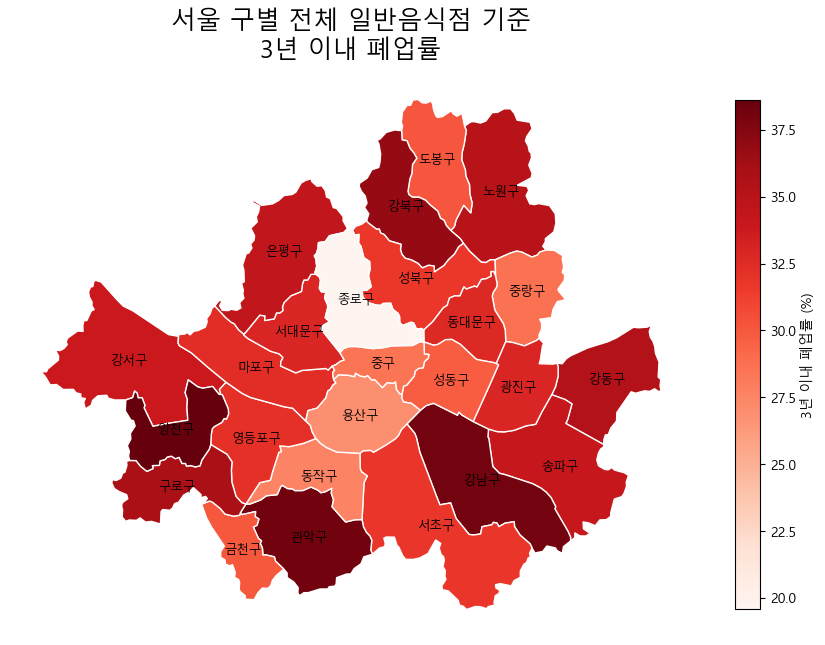

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(11, 11))

# 1️⃣ 지도 색칠
map_df.plot(
    column='폐업_3년이내',
    cmap='Reds',
    linewidth=1,
    ax=ax,
    edgecolor='white',
    legend=True,
    legend_kwds={
        'label': '3년 이내 폐업률 (%)',
        'shrink': 0.6
    }
)

# 2️⃣ 구 이름 표시 (centroid 사용)
for idx, row in map_df.iterrows():
    if row['geometry'] is not None:
        x = row['geometry'].centroid.x
        y = row['geometry'].centroid.y
        ax.text(
            x, y,
            row['구'],
            fontsize=9,
            ha='center',
            va='center',
            color='black'
        )

# 3️⃣ 제목
ax.set_title(
    '서울 구별 전체 일반음식점 기준\n3년 이내 폐업률',
    fontsize=18,
    pad=12
)

ax.axis('off')
plt.show()


In [56]:
df['생존_3년이상'] = (
    (df['폐업일자'].isna()) &
    (df['영업일수'] >= 365 * 3)
)
df['생존_3년이상'].value_counts()

False    100580
True      41810
Name: 생존_3년이상, dtype: int64

In [57]:
df['상태'] = '기타'

df.loc[df['폐업_3년이내'] == 1, '상태'] = '폐업(3년 이내)'
df.loc[df['생존_3년이상'] == True, '상태'] = '3년 이상 영업중'


In [58]:
gdf_points = gpd.GeoDataFrame(
    df[df['상태'].isin(['폐업(3년 이내)', '3년 이상 영업중'])],
    geometry=[
        Point(xy) for xy in zip(
            df.loc[df['상태'].isin(['폐업(3년 이내)', '3년 이상 영업중']), '좌표정보x(epsg5174)'],
            df.loc[df['상태'].isin(['폐업(3년 이내)', '3년 이상 영업중']), '좌표정보y(epsg5174)']
        )
    ],
    crs="EPSG:5174"
)


In [ ]:

gdf_points = gpd.GeoDataFrame(
    df,
    geometry=[
        Point(xy) for xy in zip(
            df['좌표정보x(epsg5174)'],
            df['좌표정보y(epsg5174)']
        )
    ],
    crs="EPSG:5174"
)

gdf_points.head()


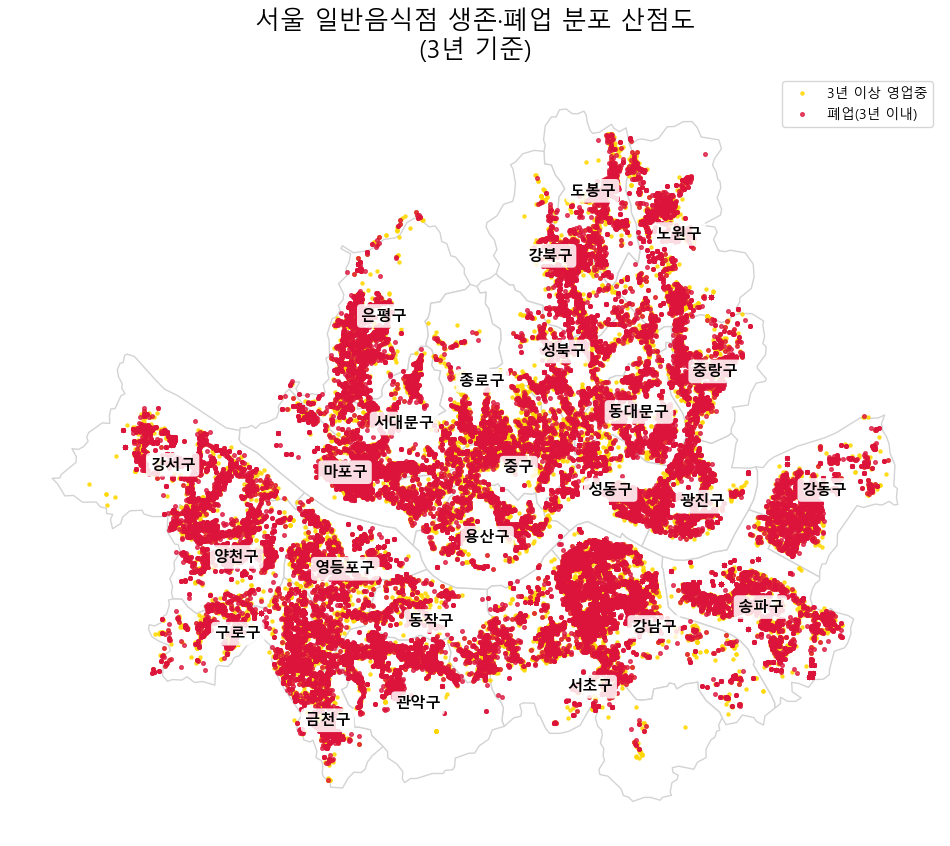

In [59]:
# 서울 지도 좌표계 변환
seoul_map_5174 = seoul_map.to_crs(epsg=5174)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# 1️⃣ 배경 지도
seoul_map_5174.plot(
    ax=ax,
    color='white',
    edgecolor='lightgray',
    linewidth=1
)

# 2️⃣ 기타 영업중 (배경)
gdf_points[gdf_points['상태'] == '기타'].plot(
    ax=ax,
    markersize=2,
    color='lightgray',
    alpha=0.2,
    label='기타 영업중'
)

# 3️⃣ 🟡 3년 이상 영업중 (생존)
gdf_points[gdf_points['상태'] == '3년 이상 영업중'].plot(
    ax=ax,
    markersize=5,
    color='gold',
    alpha=0.8,
    label='3년 이상 영업중'
)

# 4️⃣ 🔴 폐업 (3년 이내)
gdf_points[gdf_points['상태'] == '폐업(3년 이내)'].plot(
    ax=ax,
    markersize=7,
    color='crimson',
    alpha=0.75,
    label='폐업(3년 이내)'
)

# 5️⃣ 구 이름 표시 (centroid)
for idx, row in seoul_map_5174.iterrows():
    x = row.geometry.centroid.x
    y = row.geometry.centroid.y
    ax.text(
        x, y,
        row['구'],
        fontsize=11,              # 글자 키움
        fontweight='bold',        # 굵게
        ha='center',
        va='center',
        color='black',
        bbox=dict(                # ⭐ 핵심
            boxstyle='round,pad=0.25',
            facecolor='white',
            edgecolor='none',
            alpha=0.85
        )
    )

# 6️⃣ 제목
ax.set_title(
    '서울 일반음식점 생존·폐업 분포 산점도\n(3년 기준)',
    fontsize=18,
    pad=12
)

ax.legend()
ax.axis('off')
plt.show()


In [60]:
category_colors = {
    '한식': '#e41a1c',
    '분식/간편식': '#377eb8',
    '양식/외식': '#4daf4a',
    '중·일식': '#984ea3',
    '주점/치킨': '#ff7f00',
    '카페': '#a65628',
    '기타': '#999999'
}


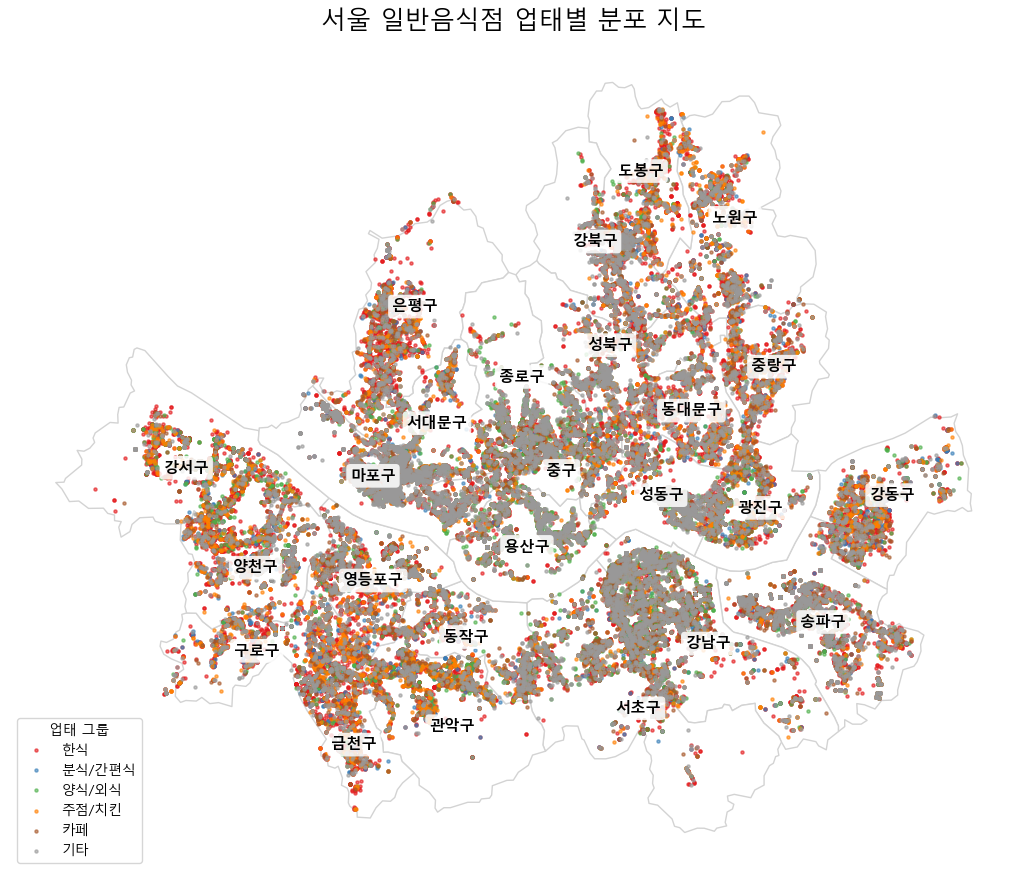

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(13, 13))

# 1️⃣ 배경 지도
seoul_map_5174.plot(
    ax=ax,
    color='white',
    edgecolor='lightgray',
    linewidth=1
)

# 2️⃣ 업태별 포인트 찍기
for category, color in category_colors.items():
    subset = gdf_points[gdf_points['업태_그룹'] == category]
    if len(subset) == 0:
        continue

    subset.plot(
        ax=ax,
        markersize=5,
        color=color,
        alpha=0.6,
        label=category
    )

# 3️⃣ 구 이름 표시
for _, row in seoul_map_5174.iterrows():
    x = row.geometry.centroid.x
    y = row.geometry.centroid.y
    ax.text(
        x, y,
        row['구'],
        fontsize=11,
        fontweight='bold',
        ha='center',
        va='center',
        bbox=dict(
            boxstyle='round,pad=0.25',
            facecolor='white',
            alpha=0.85,
            edgecolor='none'
        )
    )

# 4️⃣ 제목 & 옵션
ax.set_title(
    '서울 일반음식점 업태별 분포 지도',
    fontsize=18,
    pad=12
)
ax.legend(title='업태 그룹', loc='lower left')
ax.axis('off')

plt.show()


In [62]:
df.to_csv(
    r"C:\ai\lecNote\1st_project\data\서울_일반음식점_정제.csv",
    index=False,
    encoding="utf-8-sig"
)
